In [79]:
__author__ = 'fbb'
import pylab as pl

import pandas as pd
import os
import json

s = json.load(open(os.getenv('PUI2016')+'/fbb_matplotlibrc.json'));
pl.rcParams.update(s)

%pylab inline


Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [80]:
fdny = pd.read_csv(os.getenv("PUI2015")+"/FDNY_Line_Of_Duty_Deaths.csv")
fdny.head()


,Rank,Name,Unit,Date
0,FIREFIGHTER,THOMAS J. CONNOLLY,LADDER 28,"April 10, 1924"
1,FIREFIGHTER,JOSEPH P. AHERN,ENGINE 48,"April 10, 1934"
2,FIREFIGHTER,JOHN T. RYNN,ENGINE 89,"April 10, 1948"
3,FIREFIGHTER,DENIS J. CORRIDAN,ENGINE 324,"April 10, 1952"
4,FIREFIGHTER,JAMES J. MAINE,ENGINE 156,"April 10, 1969"


converting dates to datetime

In [81]:
pd.to_datetime(fdny.Date)

0      1924-04-10
1      1934-04-10
2      1948-04-10
3      1952-04-10
4      1969-04-10
5      1896-04-01
6      1917-04-12
7      1917-04-12
8      1901-04-14
9      1927-04-14
10     1965-04-14
11     1977-04-15
12     1868-04-16
13     1916-04-16
14     2012-04-16
15     1939-04-17
16     1957-04-17
17     1968-04-17
18     1924-04-18
19     2002-04-18
20     1930-04-19
21     1945-04-19
22     1945-04-20
23     1970-04-20
24     1951-04-22
25     1910-04-23
26     2005-04-23
27     1905-04-25
28     1912-04-25
29     1935-04-26
          ...    
1139   1921-09-18
1140   1969-09-19
1141   1963-09-02
1142   1945-09-22
1143   1953-09-22
1144   1960-09-22
1145   1911-09-24
1146   1922-09-24
1147   1937-09-24
1148   1951-09-24
1149   1997-09-24
1150   1907-09-25
1151   1927-09-26
1152   1959-09-26
1153   2003-09-27
1154   1907-09-28
1155   1925-09-29
1156   1896-09-30
1157   1938-09-03
1158   1956-09-03
1159   1935-09-05
1160   1944-09-05
1161   1973-09-06
1162   1915-09-07
1163   193

In [82]:
#to remove the hours i apply a function to my converter 
#which extracts the date only from the new datetime object
fdny.Date = pd.to_datetime(fdny.Date).apply( lambda x: x.date() )


## NOTE: for now I have a series of timestamps: this is NOT a timeseries! I have to bin the data in time intervals to have a timeseries
## a time series is data as a function of time. By binning these data I have counts of deaths as a function of time. I can keep them at the day level.

In [83]:
FSNYts = fdny[['Date', 'Name']].groupby('Date').count()#.agg('count')
FSNYts.rename(index=str, columns={"Name": "FDNY_deaths"}, inplace=True)
FSNYts.columns

Index(['FDNY_deaths'], dtype='object')

Text(0,0.5,'deaths')

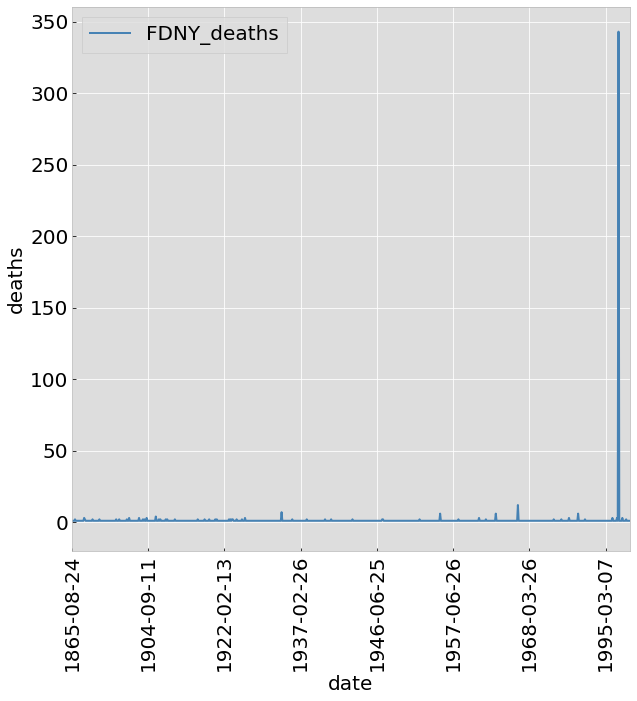

In [84]:
ax = FSNYts.plot(figsize=(10,10))

pl.xticks(rotation=90, fontsize=20)
pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.xlabel("date", fontsize=20)
pl.ylabel("deaths", fontsize=20)

## because all data are scrunched up on the y axis i am going to log space, at this stage only for visualization purposes

Text(0.5,0,'Date')

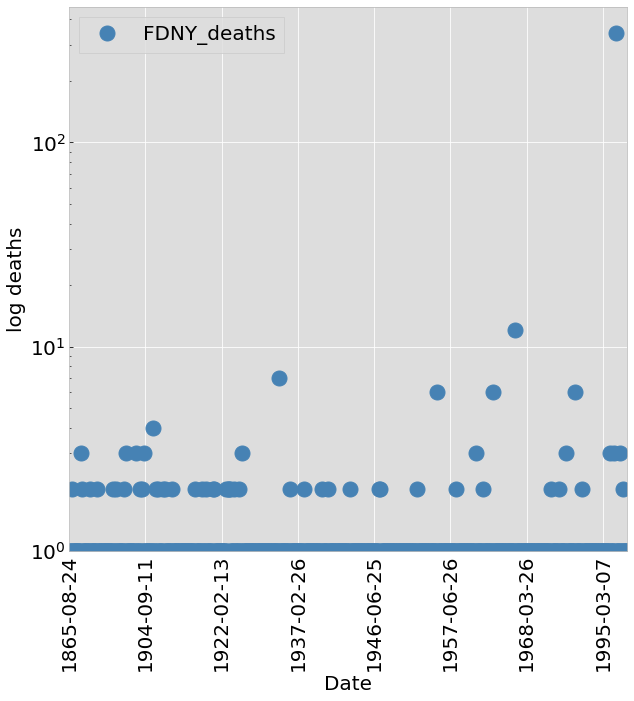

In [85]:
ax = FSNYts.plot(logy=True, figsize=(10,10), style=".", ms=30)
pl.xticks(rotation=90, fontsize=20)

pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.ylabel("log deaths", fontsize=20)
pl.xlabel("Date", fontsize=20)

Text(0.5,0,'Date')

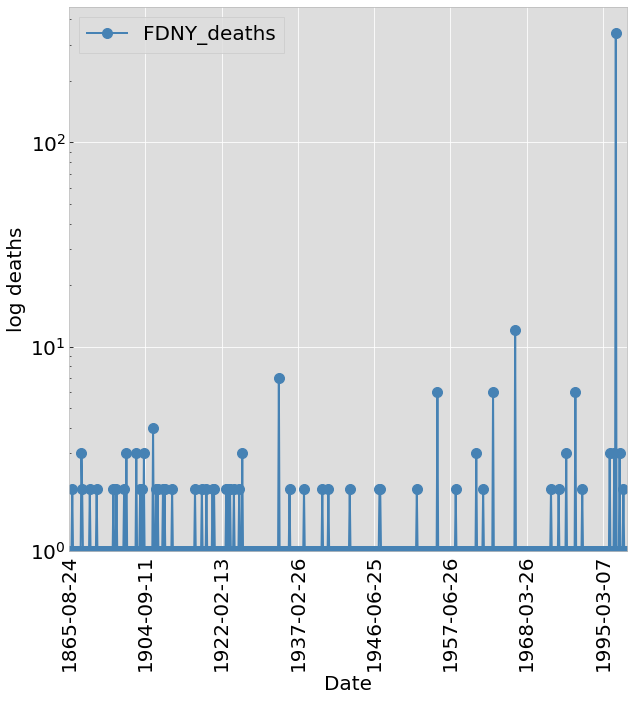

In [86]:
ax = FSNYts.plot(logy=True, figsize=(10,10), style=".-", ms=20)
pl.xticks(rotation=90, fontsize=20)

pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.ylabel("log deaths", fontsize=20)
pl.xlabel("Date", fontsize=20)

# The mean and stardand deviation of the time series can be used to set a 3-sigma threshold

## every value that is more then 3 sigma's away from the mean can be flagged as an event

In [87]:
print ("mean deaths by day {:.2f}".format(FSNYts['FDNY_deaths'].mean()))
print ("mean deaths by day {:.2f}".format(FSNYts['FDNY_deaths'].std()))
thresholds = [FSNYts['FDNY_deaths'].mean() + 3 * FSNYts['FDNY_deaths'].std(), 
              FSNYts['FDNY_deaths'].mean() - 3 * FSNYts['FDNY_deaths'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print ("earliest datapoint", min(FSNYts.index))

mean deaths by day 1.59
mean deaths by day 12.64
3-sigma thresholds 39.53 -36.34
earliest datapoint 1865-08-24


Text(0.5,0,'Date')

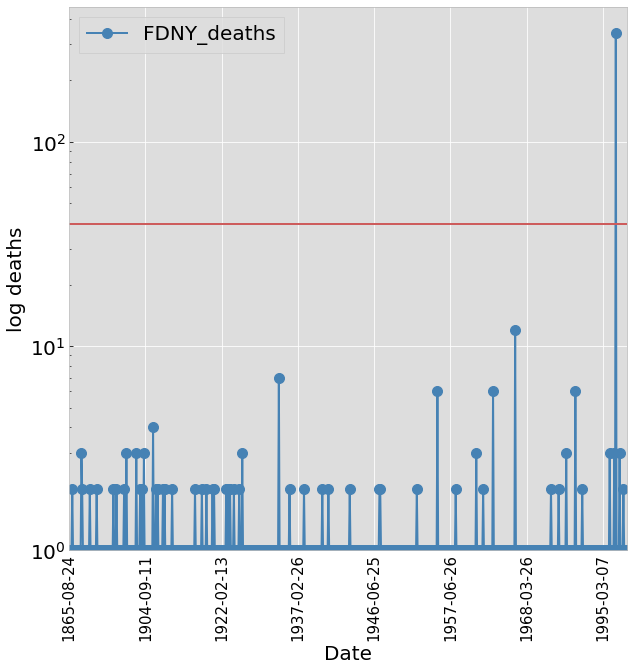

In [88]:
ax = FSNYts.plot(logy=True, figsize=(10,10), style=".-", ms=20)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]])
pl.xticks(rotation=90, fontsize=15)
pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.ylabel("log deaths", fontsize=20)
pl.xlabel("Date", fontsize=20)

In [89]:
FSNYts.loc[(FSNYts.FDNY_deaths > thresholds[0])]

,FDNY_deaths
Date,
2001-09-11,343


# What other events are significant? We can remove 9/11 and look for more outliers

In [90]:
FSNYts.loc[(FSNYts.FDNY_deaths > thresholds[0])] = NaN

mean deaths by day 1.13
mean deaths by day 0.65
earliest datapoint 1865-08-24


(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.]),
 <a list of 9 Text xticklabel objects>)

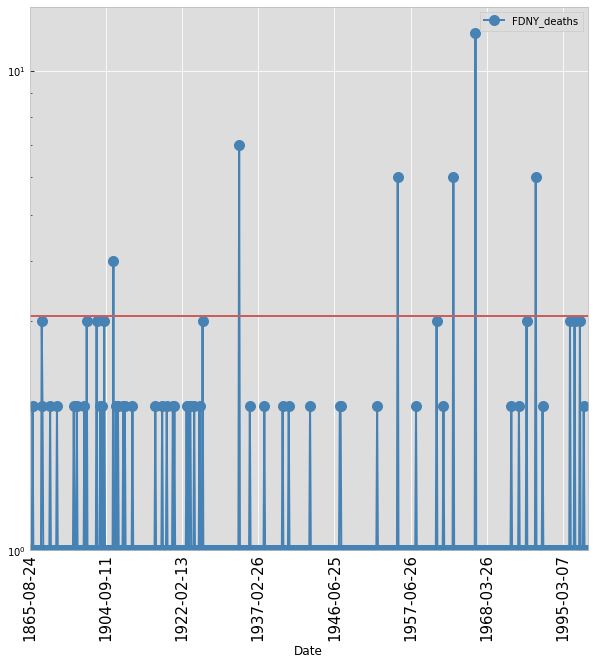

In [91]:
print ("mean deaths by day {:.2f}".format(FSNYts['FDNY_deaths'].mean()))
print ("mean deaths by day {:.2f}".format(FSNYts['FDNY_deaths'].std()))
thresholds = [FSNYts['FDNY_deaths'].mean() + 3 * FSNYts['FDNY_deaths'].std(), 
              FSNYts['FDNY_deaths'].mean() - 3 * FSNYts['FDNY_deaths'].std()]
print ("earliest datapoint", min(FSNYts.index))
ax = FSNYts.plot(logy=True, figsize=(10,10), style=".-", ms=20)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]] )
pl.xticks(rotation=90, fontsize=15)


In [92]:
FSNYts.loc[(FSNYts.FDNY_deaths>thresholds[0])]

,FDNY_deaths
Date,
1906-03-26,4
1932-08-01,7
1956-04-04,6
1962-10-26,6
1966-10-17,12
1978-08-02,6


[see: http://www.nytimes.com/2006/10/17/nyregion/17fire.html?pagewanted=all&_r=0]("http://www.nytimes.com/2006/10/17/nyregion/17fire.html?pagewanted=all&_r=0)

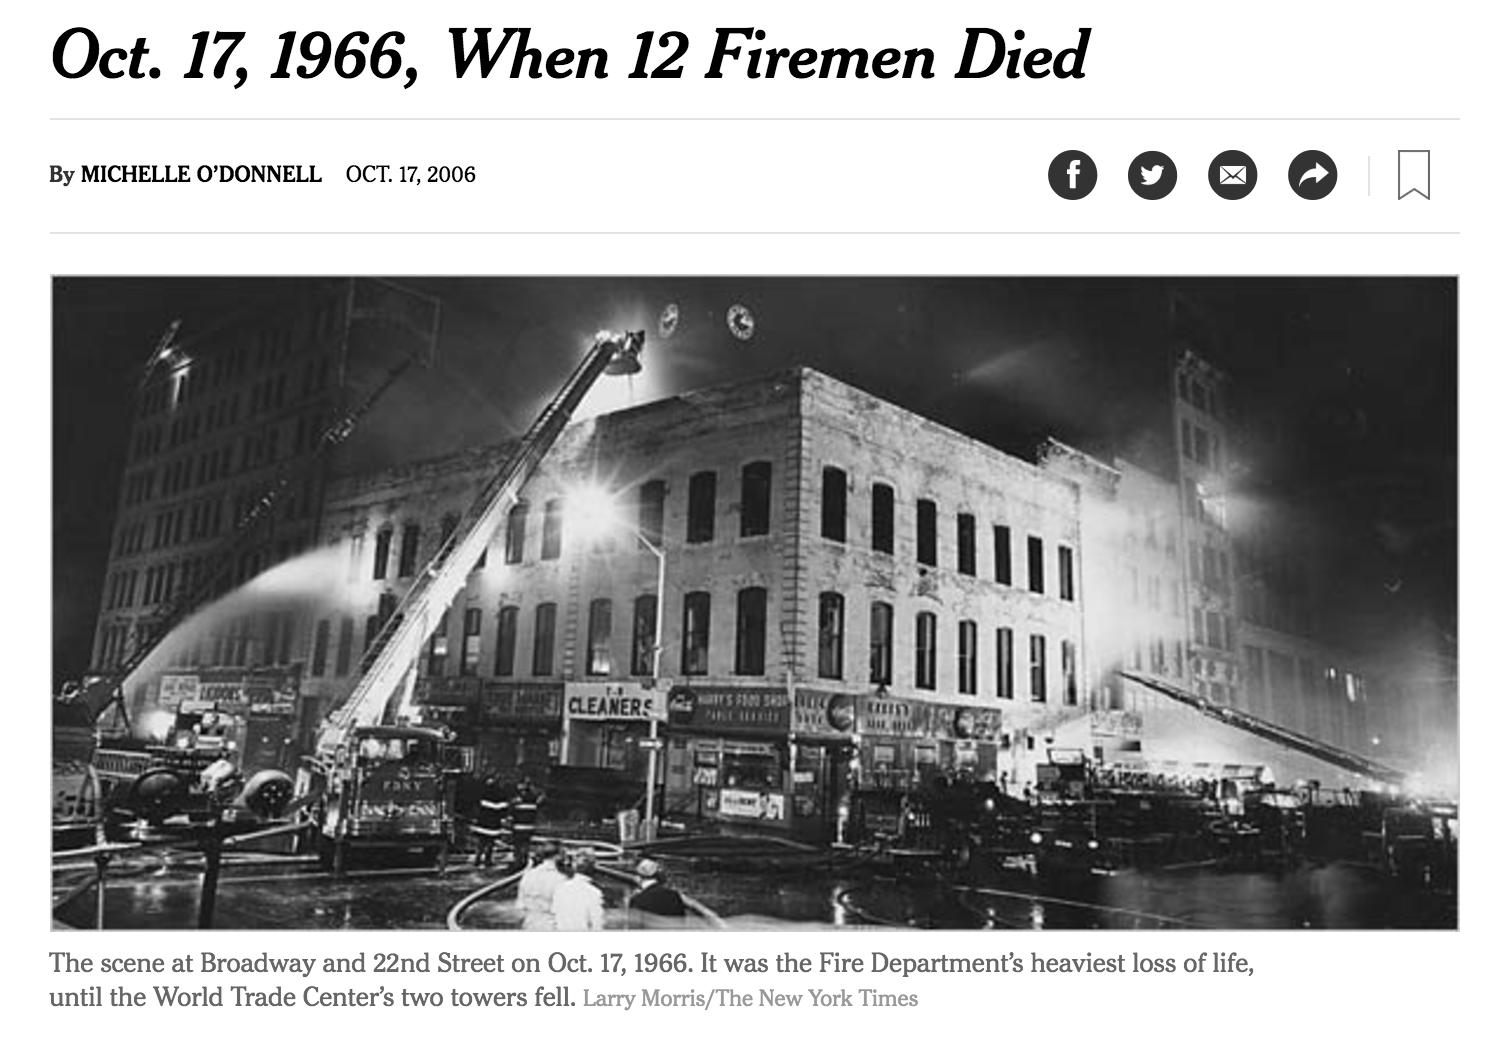

In [98]:
from IPython.core.display import Image, display
display(Image('fdnydeaths.png', width=900, unconfined=True))
